### 插值

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 数据

In [ ]:
#设置numpy浮点数显示格式
np.set_printoptions(precision=2, suppress=True)
'''
precision--精度
suppress:
如果为True，请始终使用定点表示法打印浮点数，
在这种情况下，当前精度中等于零的数字将打印为零。
如果为False，则在最小值的绝对值< 1e - 4或
最大绝对值与最小值的比率> 1e 3时使用科学记数法。默认值为False
'''
'''
numpy本地应用打印选项,如：
with np_printoptions(precision=3, suppress=True):
    print(x1)
'''

In [2]:
data = np.genfromtxt("test.txt", 
                  delimiter="\t", # TAB 分隔
                  skip_header=1,     # 忽略首行
                  names=True,     # 读入属性
                  missing_values="INFINITE",  # 缺失值
                  filling_values=np.inf)      # 填充缺失值

In [3]:
for row in data[:7]:
    print("{}\t{}".format(row['TK'], row['Cp']))
print("...\t...")

0.0	0.0
100.0	33.258
200.0	33.473
250.0	34.216
298.15	35.639
300.0	35.708
350.0	37.874
...	...


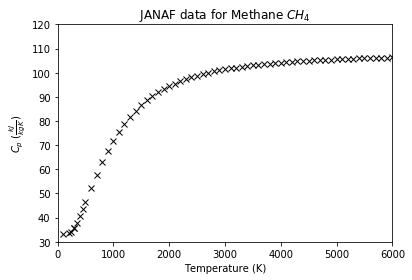

In [4]:
#数据描绘
p = plt.plot(data['TK'], data['Cp'], 'kx')
t = plt.title("JANAF data for Methane $CH_4$")
a = plt.axis([0, 6000, 30, 120])
x = plt.xlabel("Temperature (K)")
y = plt.ylabel(r"$C_p$ ($\frac{kJ}{kg K}$)")

#### 一维插值

In [5]:
from scipy.interpolate import interp1d

##### 使用`interpid`返回插值函数
> 默认超过范围的输入是非法的

In [6]:
ch4_cp = interp1d(data['TK'], data['Cp'])
# ch4_cp(9999)          #报错

In [ ]:
#可以设置超出范围的默认值
ch4_cp = interp1d(data['TK'], data['Cp'], bounds_error=False, fill_value=0.)

##### 线性插值和多项式插值
1. `interp1d` 默认的插值方法是线性

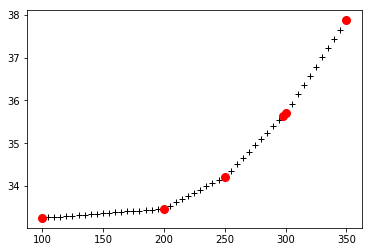

In [7]:
T = np.arange(100,355,5)
plt.plot(T, ch4_cp(T), "+k")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

2. 多项式插值  

参数`kind`|方法
----|----
`nearest`|最近邻插值
`zero`|0阶插值
`linear`|线性插值
`quadratic`|二次插值
`cubic`|三次插值
`4,5,6,7`|更高阶插值
**亲测现在4，5，6不能用，不过估计也不会用到**

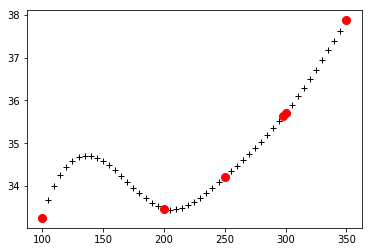

In [10]:
#4次插值
cp_ch4 = interp1d(data['TK'], data['Cp'], kind='cubic')
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

#### 高维插值

In [ ]:
from scipy.interpolate import interp2d, interpnd

#### 样条插值
> 步骤：
    - 用splrep()计算样条函数系数(高维使用splprep()函数)，其中参数k为样条函数阶数，默认为3，输出的是一个3元素的元胞数组（t,c,k）,其中t是曲线点，c是计算出来的系数
    - 用splev()计算插值结果,其中der参数表示计算样条函数的几阶导数

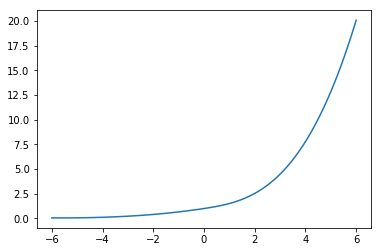

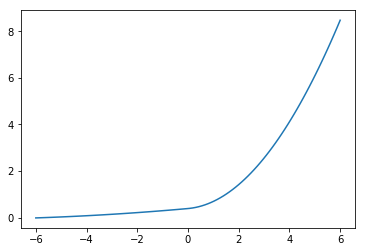

In [16]:
from scipy import interpolate
def func(x):
    return np.exp(x/2.)

x = np.linspace(-6, 6, 5)
y = func(x)
tck = interpolate.splrep(x, y, k=3)
x_ = np.linspace(-6, 6, 100)
y_ = interpolate.splev(x_, tck, der=0)
plt.plot(x_, y_)
plt.show()
y_ = interpolate.splev(x_, tck, der=1)
plt.plot(x_, y_)
plt.show()

#### 径向基函数插值  
径向基函数，简单来说就是点 $x$ 处的函数值只依赖于 $x$ 与某点 $c$ 的距离：

$$\Phi(x,c) = \Phi(\|x-c\|)$$  

常用的径向基函数：

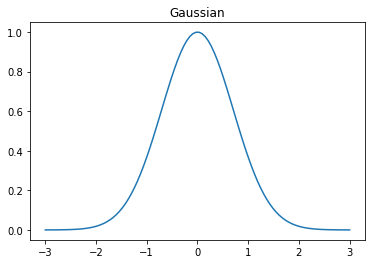

In [17]:
#高斯函数
x = np.linspace(-3,3,100)
plt.plot(x, np.exp(-1 * x **2))
t = plt.title("Gaussian")

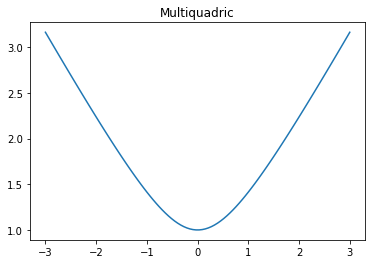

In [18]:
# Multiquadric函数
plt.plot(x, np.sqrt(1 + x **2))
t = plt.title("Multiquadric")

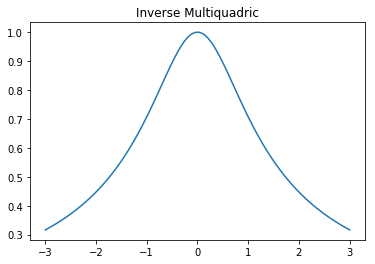

In [19]:
#Inverse Multiquadric函数
plt.plot(x, 1. / np.sqrt(1 + x **2))
t = plt.title("Inverse Multiquadric")

对于径向基函数，其插值的公式为：

$$
f(x) = \sum_j n_j \Phi(\|x-x_j\|)
$$

我们通过数据点 $x_j$ 计算出 $n_j$ 的值，来计算 $x$ 处的插值结果。

In [20]:
from scipy.interpolate.rbf import Rbf

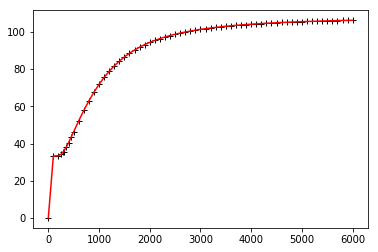

In [21]:
#使用 multiquadric 核：
# 其他：'gaussian','inverse_multiquadric'
cp_rbf = Rbf(data['TK'], data['Cp'], function = "multiquadric")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

#### 高维插值

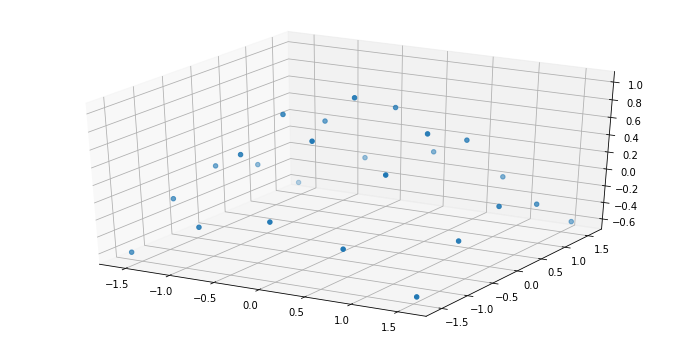

In [22]:
from mpl_toolkits.mplot3d import Axes3D

#数据
x, y = np.mgrid[-np.pi/2:np.pi/2:5j, -np.pi/2:np.pi/2:5j]
z = np.cos(np.sqrt(x**2 + y**2))
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection="3d")
ax.scatter(x,y,z)

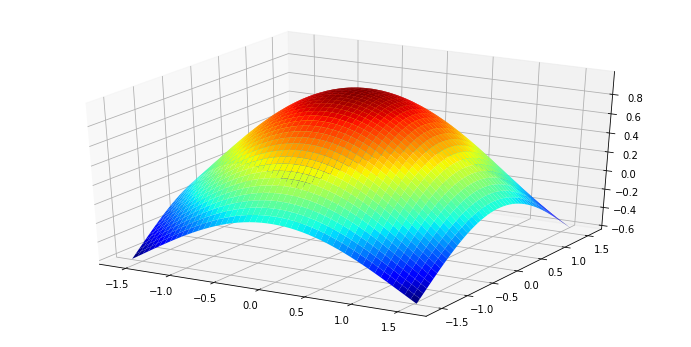

In [23]:
#插值
zz = Rbf(x, y, z)
xx, yy = np.mgrid[-np.pi/2:np.pi/2:50j, -np.pi/2:np.pi/2:50j]
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection="3d")
ax.plot_surface(xx,yy,zz(xx,yy),rstride=1, cstride=1, cmap=plt.cm.jet)

### 拟合

In [24]:
#相应的包
from numpy import polyfit, poly1d

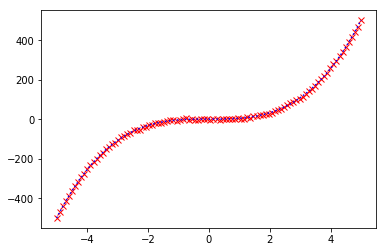

In [27]:
#数据
x = np.linspace(-5, 5, 100)
y = 4 * x**3 + 1.5
noise_y = y + np.random.randn(y.shape[-1]) * 2.5
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, y, 'b:')

#### 多项式拟合

[61.13507624  1.45589977]


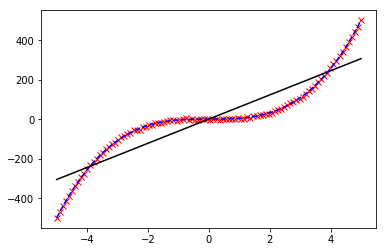

In [28]:
# polyfit，多项式拟合，
coeff = polyfit(x, noise_y, 1)
print(coeff)                                    #系数
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, coeff[0] * x + coeff[1], 'k-')  #画出拟合曲线
p = plt.plot(x, y, 'b--')

f:   
61.14 x + 1.456
           3             2
2.285e+05 x + 1.632e+04 x + 449.9 x + 4.542


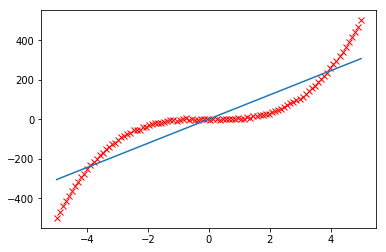

In [30]:
#使用poly1d生成拟合函数
f = poly1d(coeff)
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, f(x))
print('f: ', f)
# 对f直接进行操作：
print(f + f**3)

#### 最小二乘拟合

In [31]:
from scipy.linalg import lstsq
from scipy.stats import linregress

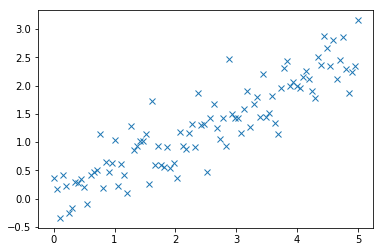

In [32]:
x = np.linspace(0,5,100)
y = 0.5 * x + np.random.randn(x.shape[-1]) * 0.35

plt.plot(x,y,'x')

多项式拟合的一般形式：
$$XC = Y$$

即

$$\left[ \begin{matrix}
x_0^{N-1} & \dots & x_0 & 1 \\\
x_1^{N-1} & \dots & x_1 & 1 \\\
\dots & \dots & \dots & \dots \\\
x_M^{N-1} & \dots & x_M & 1
\end{matrix}\right] 
\left[ \begin{matrix} C_{N-1} \\\ \dots \\\ C_1 \\\ C_0 \end{matrix} \right] =
\left[ \begin{matrix} y_0 \\\ y_1 \\\ \dots \\\ y_M \end{matrix} \right]$$

要得到 `C` ，可以使用 `scipy.linalg.lstsq` 求最小二乘解。

这里，我们使用 1 阶多项式即 `N = 2`，先将 `x` 扩展成 `X`：

In [33]:
X = np.hstack((x[:,np.newaxis], np.ones((x.shape[-1],1))))
X[1:5]

array([[0.05050505, 1.        ],
       [0.1010101 , 1.        ],
       [0.15151515, 1.        ],
       [0.2020202 , 1.        ]])

sum squared residual = 12.375
rank of the X matrix = 2
singular values of X = [30.23732043  4.82146667]


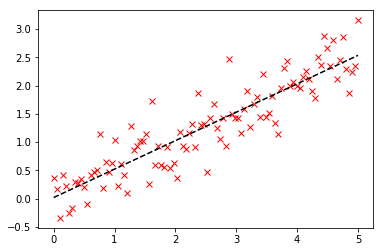

In [35]:
#求解
C, resid, rank, s = lstsq(X, y)
p = plt.plot(x, y, 'rx')
p = plt.plot(x, C[0] * x + C[1], 'k--')
print("sum squared residual = {:.3f}".format(resid))
print("rank of the X matrix = {}".format(rank))
print("singular values of X = {}".format(s))         #奇异值

##### 更高级的

In [36]:
from scipy.optimize import leastsq

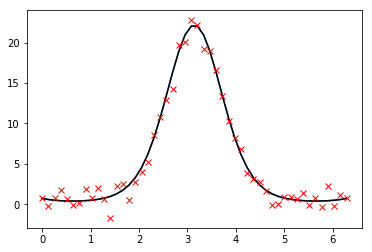

In [38]:
#定义要拟合的数据,function中定义的参数为需要求解的
def function(x, a , b, f, phi):
    """a function of x with four parameters"""
    result = a * np.exp(-b * np.sin(f * x + phi))
    return result
x = np.linspace(0, 2 * np.pi, 50)
actual_parameters = [3, 2, 1.25, np.pi / 4]
y = function(x, *actual_parameters)
p = plt.plot(x,y)
from scipy.stats import norm
y_noisy = y + 0.8 * norm.rvs(size=len(x))
p = plt.plot(x, y, 'k-')
p = plt.plot(x, y_noisy, 'rx')

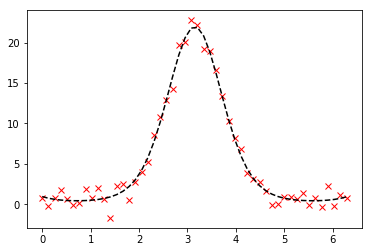

In [39]:
#定义误差计算函数
def f_err(p, y, x):
    return y - function(x, *p)
c, ret_val = leastsq(f_err, [1, 1, 1, 1], args=(y_noisy, x))
p = plt.plot(x, y_noisy, 'rx')
p = plt.plot(x, function(x, *c), 'k--')

In [40]:
#强大的curve_fit()
from scipy.optimize import curve_fit

In [41]:
#不需要定义误差计算，但这里可以定义初始值加快迭代
p_est, err_est = curve_fit(function, x, y_noisy)
#第一个参数为函数的参数，第二个为各个参数的协方差矩阵

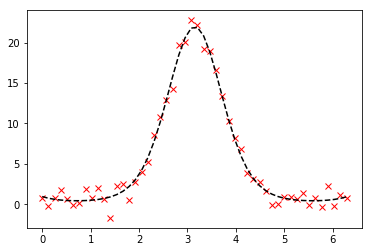

In [42]:
p = plt.plot(x, y_noisy, "rx")
p = plt.plot(x, function(x, *p_est), "k--")

### Least-square minimization(官)
- 解决的问题形式：
<img src='imgs/3_18.png' width='800px'>
    其中$f_i(x)$为$R^n$到$R$的平滑函数-->就是残差，而$\rho (.)$'is to reduce the influence of outlier residuals and contribute to robustness of the solution, we refer to it as a loss function'
- 官方建议为计算提供雅可比式，不然算法会使用' finite differences'进行评估-->时间长，而且容易出错
- 例子：
    - 11个残差项的和：
    <img src='imgs/3_19.png' width='800px'>
    建议计算的雅可比式：
    <img src='imgs/3_20.png' width='800px'>
    这里还施加了(0, 100)的约束

In [ ]:
def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y):
    '''残差'''
    return model(x, u) - y

def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J

In [ ]:
u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
              8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
              4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([2.5, 3.9, 4.15, 3.9])

res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)
print(res.x)